In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Exercício 1

Implemente o algoritmo de gradiente descendente para encontrar o mínimo da função $U(x) = x^2 -1$. É um caso bem simples para o qual sabemos a solução exata. Ilustre o algoritimo com um gráfico mostrando a função $U(x)$ e a trajetória da partícula. Use inicialmente uma taxa de aprendizado $\alpha = 0.1$ e uma tolerância $\epsilon = 0.01$. O número máximo de iterações deve ser 1000. A posição inicial da partícula deve ser $x_ {0} = 5$. Depois, varie estes parâmetros para ver como eles afetam a convergência do algoritmo.

In [2]:
U = lambda x: x**2 - 1
gradU = lambda x: 2*x

alpha1 = 0.1
epsilon1 = 0.01
x0_1 = 5
iteracoes1 = 1000


def tranjetoria(x0, alpha, epsilon, iteracoes, func):
    traj = [x0]
    for _ in range(iteracoes):
        x = x0 - alpha * func(x0)
        traj.append(x)
        x0 = x
        if abs(gradU(x)) < epsilon:
            break
        if abs(x) > 1e6:  # Limite para evitar valores muito grandes
            print("Valor de x muito grande, interrompendo para evitar overflow.")
            break
    return np.array(traj)

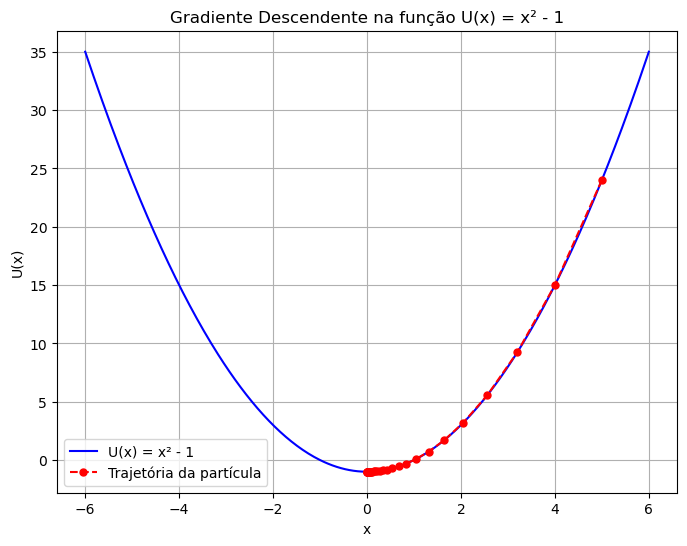

In [3]:

x_vals = np.linspace(-6, 6, 400)
y_vals = U(x_vals)

traj = tranjetoria(x0_1, alpha1, epsilon1, iteracoes1, gradU)
traj_y = U(traj)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label="U(x) = x² - 1", color='blue')
plt.plot(traj, traj_y, 'ro--', label="Trajetória da partícula", markersize=5)
plt.xlabel("x")
plt.ylabel("U(x)")
plt.title("Gradiente Descendente na função U(x) = x² - 1")
plt.legend()
plt.grid(True)
plt.show()

## Exercício 2

Repita o exercício 1 para a função $U(x) = x^2 (x-1)(x+1)$. Esta função tem dois mínimos globais. Use $x_ {0} = 2$ e tente ajustar $\alpha$ para tentar fazer o código convergir ora num mínimo, ora no outro. O que acontece? O que você pode concluir sobre a escolha da taxa de aprendizado $\alpha$?

In [4]:
U2 = lambda x: x**2 * (x - 1)*(x + 1)
gradU2 = lambda x: 4*x**3 - 2*x

x0 = 2
epsilon_2 = 0.01
iteracoes2 = 1000

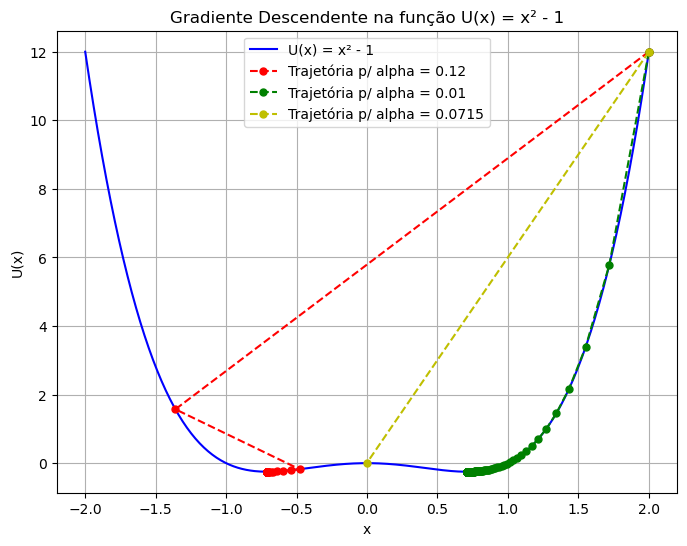

In [5]:

x_vals2 = np.linspace(-2, 2, 400)
y_vals2 = U2(x_vals2)

traj2 = tranjetoria(x0, 0.12, epsilon_2, iteracoes2, gradU2)
traj_y2 = U2(traj2)

traj3 = tranjetoria(x0, 0.01, epsilon_2, iteracoes2, gradU2)
traj_y3 = U2(traj3)

traj4 = tranjetoria(x0, 0.0715, epsilon_2, iteracoes2, gradU2)
traj_y4 = U2(traj4)


plt.figure(figsize=(8, 6))
plt.plot(x_vals2, y_vals2, label="U(x) = x² - 1", color='blue')
plt.plot(traj2, traj_y2, 'ro--', label="Trajetória p/ alpha = 0.12", markersize=5)
plt.plot(traj3, traj_y3, 'go--', label="Trajetória p/ alpha = 0.01", markersize=5)
plt.plot(traj4, traj_y4, 'yo--', label="Trajetória p/ alpha = 0.0715", markersize=5)
plt.xlabel("x")
plt.ylabel("U(x)")
plt.title("Gradiente Descendente na função U(x) = x² - 1")
plt.legend()
plt.grid(True)
plt.show()

A taxa de aprendizado influencia  não só a velocidade de na convergência do algoritmo mas, dependendo da escolha, podem existir regimes onde não se converge para o mínino global.

## Exercício 3

Repita o exercício 2, mas agora vamos manipular a altura dos mínimos somando uma reta em $U(x)$, tal que a função agora é $U(x) = x^2 (x-1)(x+1) + x/4$. O que acontece? O que você pode concluir sobre a escolha da taxa de aprendizado $\alpha$?


In [6]:
U3 = lambda x: x**2 * (x - 1)*(x + 1) + x/4
gradU3 = lambda x: 4*x**3 - 2*x + 1/4

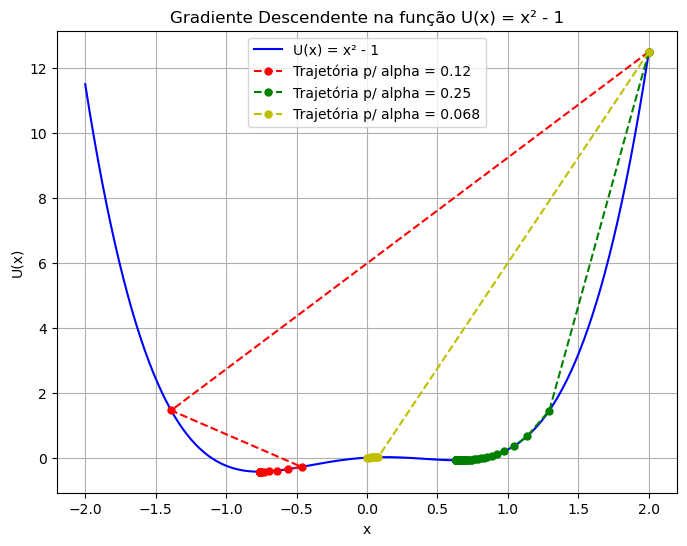

In [7]:

x_vals2 = np.linspace(-2, 2, 400)
y_vals2 = U3(x_vals2)

traj2 = tranjetoria(x0, 0.12, epsilon_2, iteracoes2, gradU3)
traj_y2 = U3(traj2)

traj3 = tranjetoria(x0, 0.025, epsilon_2, iteracoes2, gradU3)
traj_y3 = U3(traj3)

traj4 = tranjetoria(x0, 0.068, epsilon_2, iteracoes2, gradU3)
traj_y4 = U3(traj4)


plt.figure(figsize=(8, 6))
plt.plot(x_vals2, y_vals2, label="U(x) = x² - 1", color='blue')
plt.plot(traj2, traj_y2, 'ro--', label="Trajetória p/ alpha = 0.12", markersize=5)
plt.plot(traj3, traj_y3, 'go--', label="Trajetória p/ alpha = 0.25", markersize=5)
plt.plot(traj4, traj_y4, 'yo--', label="Trajetória p/ alpha = 0.068", markersize=5)
plt.xlabel("x")
plt.ylabel("U(x)")
plt.title("Gradiente Descendente na função U(x) = x² - 1")
plt.legend()
plt.grid(True)
plt.show()

Aqui se torna mais delicada a escolha de $\alpha$ pois há somente um mínimo global, mas a função tem um ponto de inflexão e um mínimo local.

## Exercício 4

Considere agora uma função bidimensional $U(\vec{r}) = U(x,y) = \sin(x)\cos(y) + 2 (xy)^2/1000$. A função tem multiplos mínimos locais. A vizualiação 3D dos passos neste caso pode ser dificil de interpretar. Então, neste caso, para acompanhar a evolução do algoritmo, faça dois gráficos:

a. Um gráfico de contorno (use `plt.imshow` ou `plt.pcolormesh`) da função $U(x,y)$ e desenhe a trajetória da partícula no gráfico.

b. Faça um gráfico do valor de $U(x_ {n}, r_ {n})$ a cada passo como função das iterações (passos) $n$. No contexto de redes neurais chamaremos estes passos de **epochs**.

Varie a posição inicial $(x_ {0}, y_ {0})$ e a taxa de aprendizado $\alpha$ e veja como isso afeta a convergência do algoritmo. O que acontece se você aumentar muito a taxa de aprendizado? E se você diminuir muito? Você consegue atingir o mínimo global?

In [8]:
U2D = lambda x, y: np.sin(x) * np.cos(y) + (x*y)**2/1000

gradU2D = lambda x, y: (np.cos(x) * np.cos(y) + 2*x*y**2/1000, -np.sin(x) * np.sin(y) + 2*x**2*y/1000)



def tranjetoria_2D(x0, y0, alpha, epsilon, iteracoes, func):
    traj = [(x0, y0)]
    for _ in range(iteracoes):
        x, y = x0 - alpha * func(x0, y0)[0], y0 - alpha * func(x0, y0)[1]
        traj.append((x, y))
        x0, y0 = x, y
        if np.linalg.norm(gradU2D(x, y)) < epsilon:
            break
        if abs(x) > 1e6 or abs(y) > 1e6:  # Limite para evitar valores muito grandes
            print("Valor de x ou y muito grande, interrompendo para evitar overflow.")
            break
    return np.array(traj)


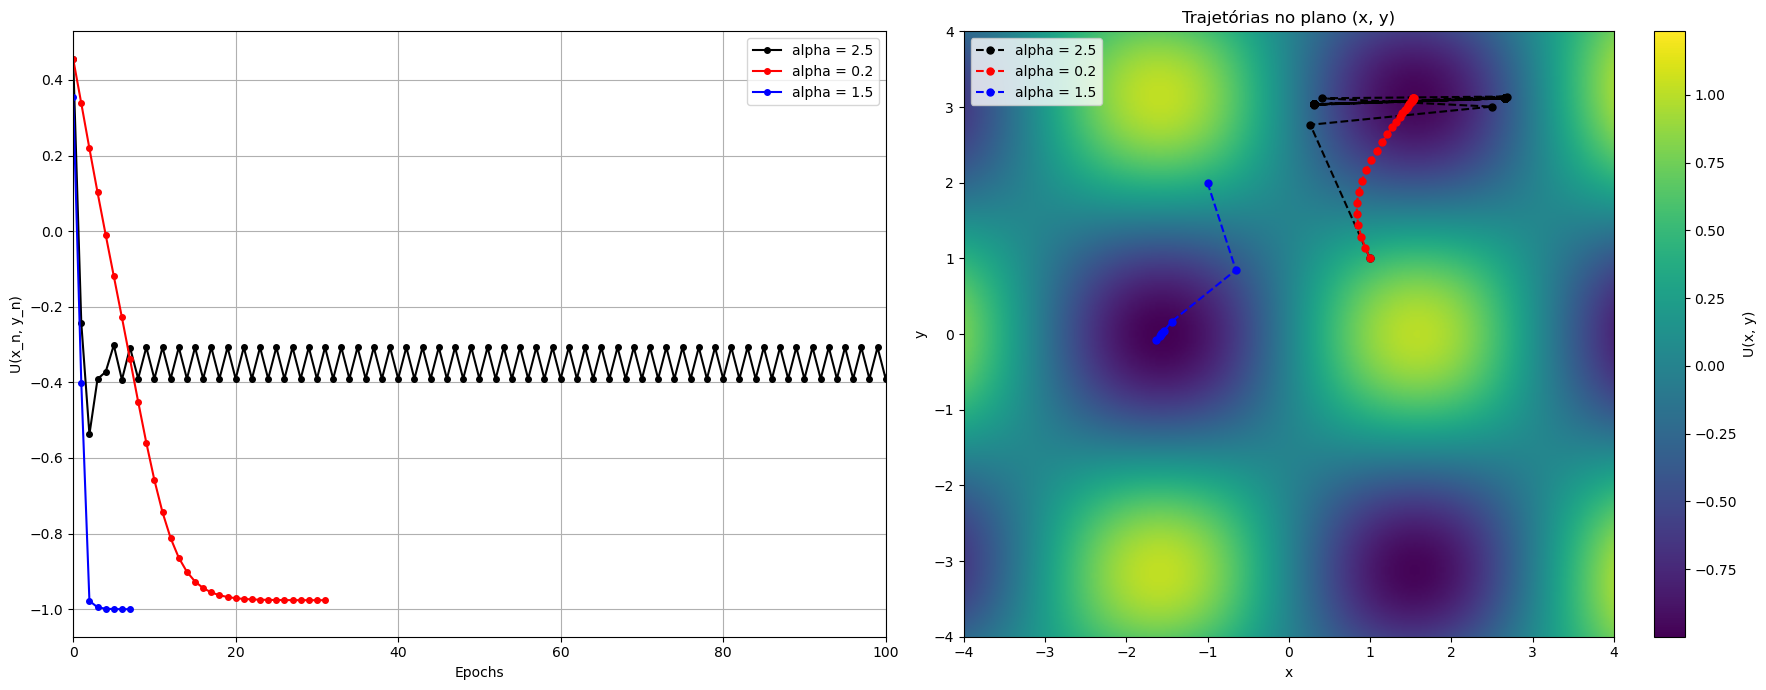

In [11]:
# Parâmetros
x0, y0 = 1, 1 # Ponto inicial
alpha = 0.1    # Taxa de aprendizado
epsilon = 0.01 # Tolerância
iteracoes = 1000

# Geração da trajetória
traj_1 = tranjetoria_2D(x0, y0, 2.5, epsilon, iteracoes, gradU2D)
traj_2 = tranjetoria_2D(x0, y0, 0.2, epsilon, iteracoes, gradU2D)
traj_3 = tranjetoria_2D(-1, 2, 1.5, epsilon, iteracoes, gradU2D)

# Geração do grid para o gráfico
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = U2D(X, Y)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Primeiro gráfico: evolução do valor de U(x_n, y_n)
axes[0].plot([U2D(x, y) for x, y in traj_1], 'o-', label="alpha = 2.5", markersize=4, c='black')
axes[0].plot([U2D(x, y) for x, y in traj_2], 'ro-', label="alpha = 0.2", markersize=4)
axes[0].plot([U2D(x, y) for x, y in traj_3], 'bo-', label="alpha = 1.5", markersize=4)
axes[0].set_xlim(0, 100)
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("U(x_n, y_n)")
axes[0].legend()
axes[0].grid(True)

# Segundo gráfico: trajetória no espaço (x, y)
im = axes[1].imshow(Z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis', aspect='auto')
axes[1].plot(traj_1[:, 0], traj_1[:, 1], 'o--', label="alpha = 2.5", markersize=5, c='black')
axes[1].plot(traj_2[:, 0], traj_2[:, 1], 'ro--', label="alpha = 0.2", markersize=5)
axes[1].plot(traj_3[:, 0], traj_3[:, 1], 'bo--', label="alpha = 1.5", markersize=5)
axes[1].set_title("Trajetórias no plano (x, y)")
axes[1].set_xlabel("x")
axes[1].set_xlim(-4, 4)
axes[1].set_ylim(-4, 4)
axes[1].set_ylabel("y")
axes[1].legend()

# Adiciona a barra de cores ao lado do segundo gráfico
cbar = fig.colorbar(im, ax=axes[1], label='U(x, y)')

plt.tight_layout()
plt.show()

Nesse caso podemos observar que se $\alpha$ for muito grande o algoritmo diverge, e se for muito pequeno o algoritmo converge lentamente.